# 樣型識別 CH08 練習

資工四 B0729003 何妍霖


# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [32]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [33]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 3, 3, 128)         7385

**Training the convnet on MNIST images**

In [34]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1514 - accuracy: 0.9528
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0440 - accuracy: 0.9867
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0304 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0224 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0179 - accuracy: 0.9947


**Evaluating the convnet**

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9899
Test accuracy: 0.990


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [36]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [37]:
model_no_max_pool.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_30 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 flatten_8 (Flatten)         (None, 61952)             0         
                                                                 
 dense_8 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

In [38]:
# from google.colab import files
# files.upload()

In [39]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [40]:
# !kaggle competitions download -c dogs-vs-cats

In [41]:
# !unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [42]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

# def make_subset(subset_name, start_index, end_index):
#     for category in ("cat", "dog"):
#         dir = new_base_dir / subset_name / category
#         os.makedirs(dir)
#         fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
#         for fname in fnames:
#             shutil.copyfile(src=original_dir / fname,
#                             dst=dir / fname)

# make_subset("train", start_index=0, end_index=1000)
# make_subset("validation", start_index=1000, end_index=1500)
# make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [44]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

**Configuring the model for training**

In [45]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [46]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [47]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [48]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [49]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [50]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [51]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [52]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 58ms/step - loss: 0.7356 - accuracy: 0.5020 - val_loss: 0.6912 - val_accuracy: 0.5170
Epoch 2/30
63/63 [==============================] - 3s 44ms/step - loss: 0.7092 - accuracy: 0.5205 - val_loss: 0.7091 - val_accuracy: 0.5040
Epoch 3/30
63/63 [==============================] - 3s 45ms/step - loss: 0.7675 - accuracy: 0.5630 - val_loss: 0.6550 - val_accuracy: 0.5930
Epoch 4/30
63/63 [==============================] - 3s 45ms/step - loss: 0.6774 - accuracy: 0.6100 - val_loss: 0.6793 - val_accuracy: 0.5510
Epoch 5/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6402 - accuracy: 0.6395 - val_loss: 0.6117 - val_accuracy: 0.6490
Epoch 6/30
63/63 [==============================] - 3s 46ms/step - loss: 0.5863 - accuracy: 0.6890 - val_loss: 0.6407 - val_accuracy: 0.6290
Epoch 7/30
63/63 [==============================] - 3s 47ms/step - loss: 0.5660 - accuracy: 0.7175 - val_loss: 0.5715 - val_accuracy: 0.7220
Epoch 8/30
63

**Displaying curves of loss and accuracy during training**

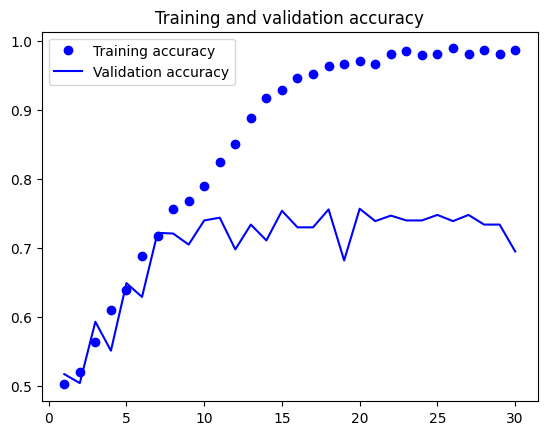

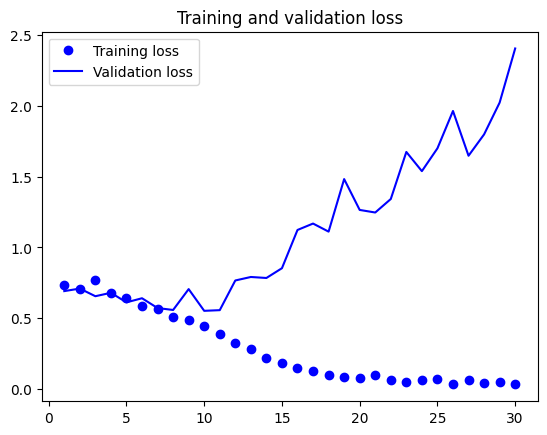

In [53]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [54]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 21ms/step - loss: 0.5965 - accuracy: 0.7335
Test accuracy: 0.734


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [55]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

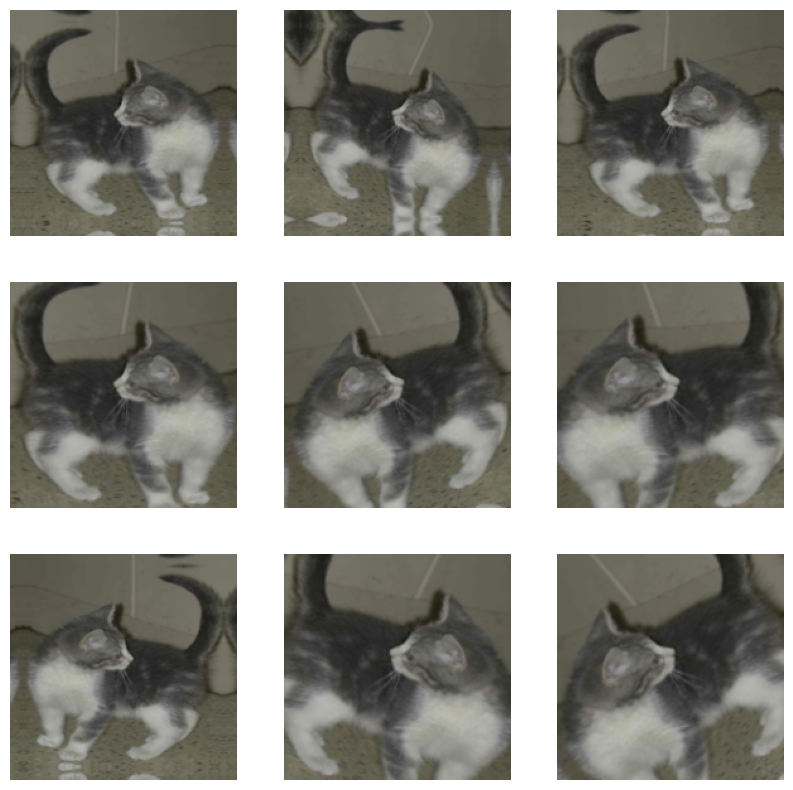

In [56]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [57]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [58]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 4s 50ms/step - loss: 0.6996 - accuracy: 0.4980 - val_loss: 0.6915 - val_accuracy: 0.5010
Epoch 2/100
63/63 [==============================] - 3s 47ms/step - loss: 0.6933 - accuracy: 0.5465 - val_loss: 0.7303 - val_accuracy: 0.5380
Epoch 3/100
63/63 [==============================] - 3s 47ms/step - loss: 0.6962 - accuracy: 0.5900 - val_loss: 0.6680 - val_accuracy: 0.5930
Epoch 4/100
63/63 [==============================] - 3s 47ms/step - loss: 0.6564 - accuracy: 0.6330 - val_loss: 0.6614 - val_accuracy: 0.5970
Epoch 5/100
63/63 [==============================] - 3s 48ms/step - loss: 0.6516 - accuracy: 0.6205 - val_loss: 0.6244 - val_accuracy: 0.6510
Epoch 6/100
63/63 [==============================] - 3s 48ms/step - loss: 0.6272 - accuracy: 0.6525 - val_loss: 0.6087 - val_accuracy: 0.6560
Epoch 7/100
63/63 [==============================] - 3s 47ms/step - loss: 0.6205 - accuracy: 0.6625 - val_loss: 0.6593 - val_accuracy: 0.5890
Epoch 

63/63 [==============================] - 3s 46ms/step - loss: 0.2357 - accuracy: 0.9070 - val_loss: 0.5472 - val_accuracy: 0.8210
Epoch 59/100
63/63 [==============================] - 3s 46ms/step - loss: 0.2555 - accuracy: 0.8925 - val_loss: 0.6794 - val_accuracy: 0.8040
Epoch 60/100
63/63 [==============================] - 3s 46ms/step - loss: 0.2127 - accuracy: 0.9200 - val_loss: 0.7397 - val_accuracy: 0.8160
Epoch 61/100
63/63 [==============================] - 3s 46ms/step - loss: 0.2381 - accuracy: 0.9075 - val_loss: 0.4149 - val_accuracy: 0.8430
Epoch 62/100
63/63 [==============================] - 3s 46ms/step - loss: 0.2488 - accuracy: 0.9040 - val_loss: 0.5853 - val_accuracy: 0.8300
Epoch 63/100
63/63 [==============================] - 3s 46ms/step - loss: 0.2090 - accuracy: 0.9225 - val_loss: 0.6722 - val_accuracy: 0.8150
Epoch 64/100
63/63 [==============================] - 3s 46ms/step - loss: 0.2099 - accuracy: 0.9210 - val_loss: 0.4725 - val_accuracy: 0.8250
Epoch 65/100

**Evaluating the model on the test set**

In [59]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 19ms/step - loss: 0.4124 - accuracy: 0.8295
Test accuracy: 0.830


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [60]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 2s 0us/step


In [61]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [62]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [63]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [64]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 17.1539 - accuracy: 0.9260 - val_loss: 4.3688 - val_accuracy: 0.9640
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 3.1398 - accuracy: 0.9730 - val_loss: 9.0494 - val_accuracy: 0.9510
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 2.3884 - accuracy: 0.9820 - val_loss: 4.3520 - val_accuracy: 0.9710
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.4322 - accuracy: 0.9915 - val_loss: 3.8730 - val_accuracy: 0.9700
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0173 - accuracy: 0.9900 - val_loss: 4.2887 - val_accuracy: 0.9780
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.5853 - accuracy: 0.9950 - val_loss: 3.7583 - val_accuracy: 0.9810
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5005 - accuracy: 0.9945 - val_loss: 3.9303 - val_accuracy: 0.9750
Epoch 8/20
63/63 [=

**Plotting the results**

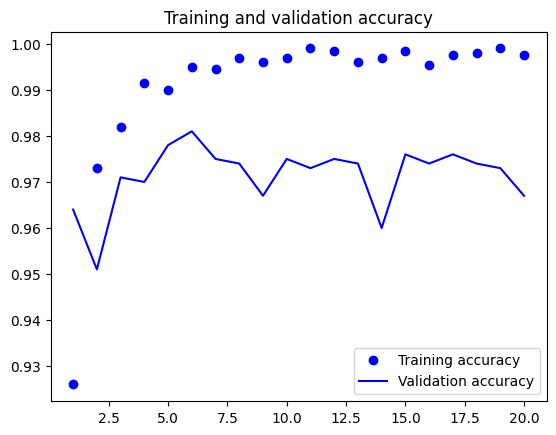

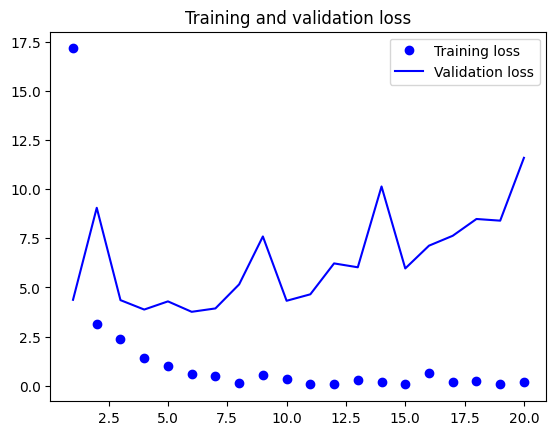

In [65]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [66]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [67]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [68]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [69]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [70]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 7s 98ms/step - loss: 24.4912 - accuracy: 0.8955 - val_loss: 5.1683 - val_accuracy: 0.9600
Epoch 2/50
63/63 [==============================] - 6s 96ms/step - loss: 7.1466 - accuracy: 0.9470 - val_loss: 4.6476 - val_accuracy: 0.9700
Epoch 3/50
63/63 [==============================] - 6s 93ms/step - loss: 6.2572 - accuracy: 0.9485 - val_loss: 6.5026 - val_accuracy: 0.9690
Epoch 4/50
63/63 [==============================] - 6s 96ms/step - loss: 5.9293 - accuracy: 0.9590 - val_loss: 4.1767 - val_accuracy: 0.9780
Epoch 5/50
63/63 [==============================] - 6s 94ms/step - loss: 4.7374 - accuracy: 0.9615 - val_loss: 6.2097 - val_accuracy: 0.9700
Epoch 6/50
63/63 [==============================] - 6s 94ms/step - loss: 4.4942 - accuracy: 0.9715 - val_loss: 4.3561 - val_accuracy: 0.9790
Epoch 7/50
63/63 [==============================] - 6s 94ms/step - loss: 3.4098 - accuracy: 0.9695 - val_loss: 6.9067 - val_accuracy: 0.9730
Epoch 8/50
6

**Evaluating the model on the test set**

In [71]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 59ms/step - loss: 2.4308 - accuracy: 0.9750
Test accuracy: 0.975


### Fine-tuning a pretrained model

In [72]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [73]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [74]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 108ms/step - loss: 0.3442 - accuracy: 0.9900 - val_loss: 2.0584 - val_accuracy: 0.9790
Epoch 2/30
63/63 [==============================] - 7s 105ms/step - loss: 0.4396 - accuracy: 0.9875 - val_loss: 2.0047 - val_accuracy: 0.9810
Epoch 3/30
63/63 [==============================] - 7s 105ms/step - loss: 0.2800 - accuracy: 0.9940 - val_loss: 1.7440 - val_accuracy: 0.9810
Epoch 4/30
63/63 [==============================] - 7s 105ms/step - loss: 0.2393 - accuracy: 0.9925 - val_loss: 1.6533 - val_accuracy: 0.9780
Epoch 5/30
63/63 [==============================] - 7s 103ms/step - loss: 0.2741 - accuracy: 0.9890 - val_loss: 1.7021 - val_accuracy: 0.9760
Epoch 6/30
63/63 [==============================] - 7s 108ms/step - loss: 0.1596 - accuracy: 0.9930 - val_loss: 1.4995 - val_accuracy: 0.9820
Epoch 7/30
63/63 [==============================] - 7s 105ms/step - loss: 0.1364 - accuracy: 0.9930 - val_loss: 1.4484 - val_accuracy: 0.9820
Epoch 

In [75]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 60ms/step - loss: 1.5533 - accuracy: 0.9775
Test accuracy: 0.978


## Summary